In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
from glob import glob
from os import listdir

In [3]:
def MarkObject(img):
    imax=img.shape[0]
    jmax=img.shape[1]
    objectness=np.zeros((imax,jmax))
    direction=[[0,1],[1,0],[0,-1],[-1,0]]

    def dfs(img,i,j):
        if i<0 or j<0 or i>=imax or j>=jmax or (img[i][j]==0).all() or objectness[i][j]==1:
            return

        objectness[i][j]=1

        for d in direction:
            dfs(img,i+d[0],j+d[0])
        return
    
    for i in range(0,imax):
        for j in range(0,jmax):
            if objectness[i][j]!=1 and (img[i][j]!=0).any():
                dfs(img,i,j)

            else:
                continue
    
    return objectness

In [4]:
def MarkGolgi(top,left,img,obj):
    imax=img.shape[0]
    jmax=img.shape[1]

    for i in range(0,imax):
        for j in range(0,jmax):
            if (img[i][j]!=0).any():
                obj[top+i][left+j]=2

In [7]:
folders_composite=glob("Composite Images/*/")
folders_composite

['Composite Images\\20190508-C2GNT1-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT

In [8]:
labels=pd.read_csv('labels.csv',index_col=0)
labels

,label
0,20190508-C2GNT1-EGFP-Noc-01
1,20190508-C2GNT1-EGFP-Noc-02
2,20190508-C2GNT1-EGFP-Noc-03
3,20190508-C2GNT1-EGFP-Noc-04
4,20190508-C2GNT1-EGFP-Noc-05
5,20190508-GALNT4-EGFP-Noc-01
6,20190508-GALNT4-EGFP-Noc-02
7,20190508-GALNT4-EGFP-Noc-03
8,20190508-GALNT4-EGFP-Noc-04
9,20190508-GALNT4-EGFP-Noc-05


## Generate Objectness Image

In [14]:
for i in range(1,40):

    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)
    objectness=MarkObject(img)
    objectness_with_golgi=objectness.copy()

    roi_co_file_path=folders_composite[i]+"\\{}-ROI Coordinates.csv".format(labels.iloc[i].values[0])
    roi_coordinates=pd.read_csv(roi_co_file_path,index_col=0)

    for index,row in roi_coordinates.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']
        MarkGolgi(top,left,img[top:bottom,left:right],objectness_with_golgi)
    
    golgy_objectness=objectness_with_golgi-objectness
    non_golgy_object=objectness-golgy_objectness

    io.imsave(folders_composite[i]+'\\all_object.tif',objectness)
    io.imsave(folders_composite[i]+'\\golgy_object.tif',golgy_objectness)
    io.imsave(folders_composite[i]+'\\non_golgy_object.tif',non_golgy_object)
    io.imsave(folders_composite[i]+'\\all_object.png',objectness)
    io.imsave(folders_composite[i]+'\\golgy_object.png',golgy_objectness)
    io.imsave(folders_composite[i]+'\\non_golgy_object.png',non_golgy_object)

    print("Done with {}".format(labels.iloc[i].values[0]))

ve(folders_composite[i]+'\\golgy_object.tif',golgy_objectness)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-14-69ab1b867af9>:25: UserWarning: Composite Images\20190508-GALNT8-EGFP-Noc-05-Data Preparation\\golgy_object.png is a low contrast image
  io.imsave(folders_composite[i]+'\\golgy_object.png',golgy_objectness)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Done with 20190508-GALNT8-EGFP-Noc-05
<ipython-input-14-69ab1b867af9>:22: UserWarning: Composite Images\20190508-GALNT8-EGFP-Noc-06-Data Preparation\\golgy_object.tif is a low contrast image
  io.imsave(folders_composite[i]+'\\golgy_object.tif',golgy_objectness)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving

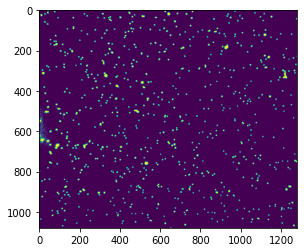

In [15]:
plt.imshow(objectness)

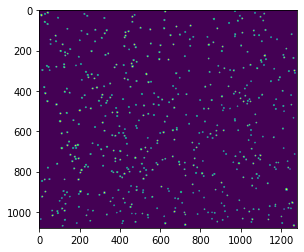

In [16]:
plt.imshow(golgy_objectness)

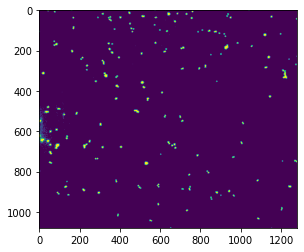

In [18]:
plt.imshow(non_golgy_object)

In [19]:
 roi_coordinates

,top,bottom,left,right
0,0,15,965,980
1,3,18,620,635
2,8,23,38,53
3,8,23,1064,1079
4,10,28,215,230
...,...,...,...,...
528,1051,1066,405,420
529,1047,1062,1200,1215
530,1056,1071,716,731
531,1059,1074,1256,1271
